References from
https://www.tensorflow.org/tutorials/keras/classification and 
https://euclid.ucc.ie/amann/AM6016/L06.ipynb

In [21]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


(train_images, train_labels), (test_images, test_labels) = \
                               keras.datasets.fashion_mnist.load_data()


print('Training images = ', train_images.shape)
print('Test images = ', test_images.shape)

Training images =  (60000, 28, 28)
Test images =  (10000, 28, 28)


There are 60,000 training images and 10,000 test images, each of size 28x28

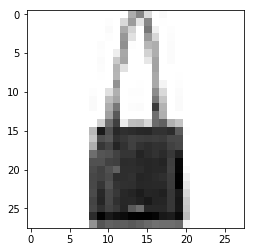

In [22]:
# Image of a bag :
plt.imshow(train_images[200],cmap="binary")

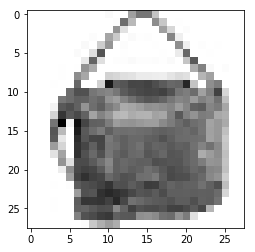

In [23]:
# Another bag:
plt.imshow(train_images[212],cmap="binary")

Class names in the dataset obtained from https://github.com/zalandoresearch/fashion-mnist : 

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover',\
               'Dress', 'Coat','Sandal', 'Shirt',\
               'Sneaker', 'Bag', 'Ankle boot']

train_images.dtype

dtype('float64')

The data type is unsigned integer; therefore the values can only range from 0 to 255. Hence, it is possible to normalize the data.

In [26]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##### Plot a grid of the first 25 images in the training data :

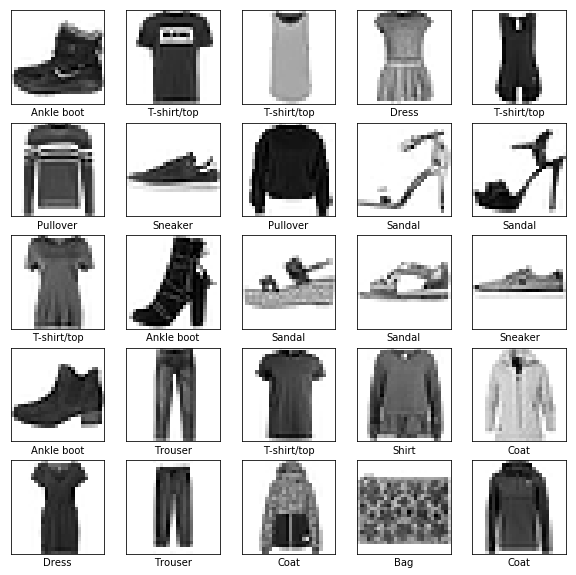

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])



##### Now build the neural network:

In [28]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4988 - acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3727 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3383 - acc: 0.8752
Epoch 4/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.3155 - acc: 0.8840
Epoch 5/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2962 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2827 - acc: 0.8950
Epoch 7/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2699 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2595 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2505 - acc: 0.9068
Epoch 10/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.2412 - acc: 0.9102

##### Check the test accuracy:

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 34us/step
Test accuracy: 0.8809


##### Get all predictions on the test data for analysis

In [30]:
predictions = model.predict(test_images)

##### Randomly check one of the predictions:

In [31]:
index = 220

np.argmax(predictions[index]), class_names[np.argmax(predictions[index])]

(8, 'Bag')

Bag


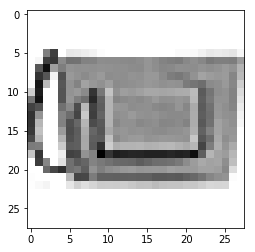

In [32]:
print(class_names[np.argmax(predictions[index])])
plt.imshow(test_images[index],cmap="binary")

For the above image, the network prediction agrees with the test label 'Bag'.

##### Now analyze a few more predictions.

In [33]:
# Helper frunctions for plotting images and confidence levels

def plot_image(predicted_probabilities, actual_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predicted_probabilities)
  if predicted_label == actual_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicted_probabilities),
                                class_names[actual_label]),
                                color=color)

def plot_confidence(predicted_probabilities, actual_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)),\
                     predicted_probabilities, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicted_probabilities)
  
  thisplot[predicted_label].set_color('red')
  thisplot[actual_label].set_color('blue')

##### Plot the first 15 test images, their predicted label, and the actual label
<br>
Correct predictions in blue, incorrect predictions in red

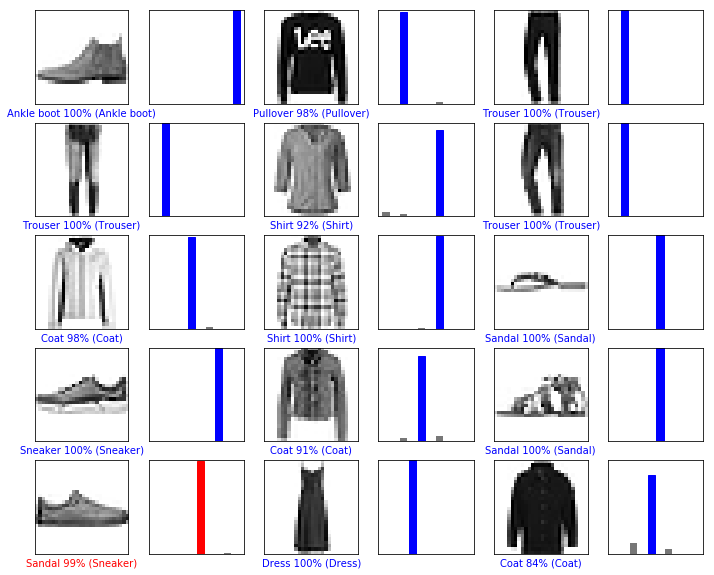

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[i], test_labels[i], test_images[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_confidence(predictions[i], test_labels[i])
plt.show()

While most of the items have been classified correctly, the network falters in classfying item 12.<br>
It makes an error and classifies the sneaker as a sandal.

##### Plot the correctly classified shirt and its confidence:

T-Shirt 0.050568525 Trouser 3.7219306e-07 Pullover 0.023364631 Dress 0.0011868312 Coat 0.00509029 Sandal 4.561127e-07 Shirt 0.9197428 Sneaker 5.8490116e-07 Bag 7.38935e-06 Ankle boot 3.8012222e-05


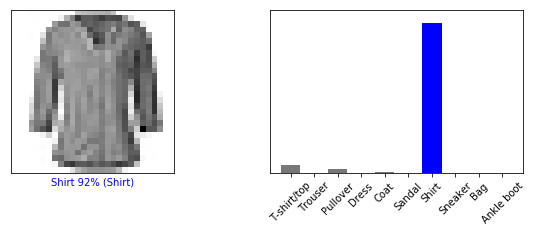

In [35]:


i = 4 #Shirt
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_confidence(predictions[i],  test_labels[i])
plt.xticks(range(10), class_names, rotation=45)
print("T-Shirt", predictions[i][0], "Trouser", predictions[i][1],\
      "Pullover", predictions[i][2], "Dress", predictions[i][3],\
      "Coat", predictions[i][4], "Sandal", predictions[i][5],\
      "Shirt",predictions[i][6], "Sneaker", predictions[i][7],\
      "Bag", predictions[i][8], "Ankle boot", predictions[i][9])
plt.show()


##### Plot the incorrectly classified sneaker and its confidence values:

T-Shirt 1.1815073e-08 Trouser 1.2879322e-07 Pullover 4.775902e-11 Dress 5.8799645e-07 Coat 5.75791e-09 Sandal 0.9891977 Shirt 4.473537e-12 Sneaker 0.0023557271 Bag 0.00844579 Ankle boot 6.985571e-08


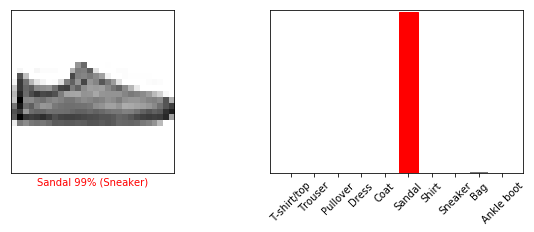

In [36]:
i = 12 #Sneaker
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_confidence(predictions[i],  test_labels[i])
plt.xticks(range(10), class_names, rotation=45)
print("T-Shirt", predictions[i][0], "Trouser", predictions[i][1],\
      "Pullover", predictions[i][2], "Dress", predictions[i][3],\
      "Coat", predictions[i][4], "Sandal", predictions[i][5],\
      "Shirt", predictions[i][6], "Sneaker", predictions[i][7],\
      "Bag", predictions[i][8], "Ankle boot", predictions[i][9])
plt.show()